<a href="https://colab.research.google.com/github/lautitorraca/7506R-2C2023-GRUPO24/blob/main/TP1/limpieza_de_datos.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [150]:
!pip install 'dtreeviz'

In [151]:
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier, NeighborhoodComponentsAnalysis
from sklearn.metrics import (
    accuracy_score,
    confusion_matrix,
    classification_report,
    precision_recall_curve,
    roc_curve,
    recall_score,
    f1_score,
    precision_score,
)

# Visualización
import matplotlib.pyplot as plt
import seaborn as sns
import dtreeviz.trees as dtreeviz

# Modelos y métricas
from sklearn import tree
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import MinMaxScaler
from sklearn.svm import SVC
from sklearn.datasets import make_classification
from xgboost import XGBClassifier
import xgboost as xgb
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV
from sklearn.ensemble import VotingClassifier
from sklearn.model_selection import StratifiedKFold, KFold
from sklearn.metrics import roc_auc_score
from sklearn.neural_network import MLPClassifier
from google.colab import files

# Configuración de advertencias
import warnings

warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.simplefilter(action='ignore', category=UserWarning)

In [152]:
url_train = 'https://raw.githubusercontent.com/lautitorraca/7506R-2C2023-GRUPO24/main/TP1/DataSets/hotels_train.csv'
url_test = 'https://raw.githubusercontent.com/lautitorraca/7506R-2C2023-GRUPO24/main/TP1/DataSets/hotels_test.csv'

ds_train_base = pd.read_csv(url_train)
ds_test_base = pd.read_csv(url_test)

ds_test = ds_test_base.copy()
df_test = pd.DataFrame(ds_test_base)

ds_train = ds_train_base.copy()
df_train = pd.DataFrame(ds_train_base)

### Test


In [153]:

df_test['room_type_match'] = df_test['assigned_room_type'] == df_test['reserved_room_type']
df_test['cancel_to_noncancel_ratio'] = df_test['previous_cancellations'] / (1 + df_test['previous_bookings_not_canceled'])
df_test['lead_time_category'] = pd.cut(df_test['lead_time'], bins=[0, 10, 50, 100, 500, 10000], labels=['Very Short', 'Short', 'Medium', 'Long', 'Very Long'], right=False)
df_test['days_in_waiting_list_category'] = pd.cut(df_test['days_in_waiting_list'], bins=[0, 10, 50, 100, 500, 10000], labels=['Very Short', 'Short', 'Medium', 'Long', 'Very Long'], right=False)

country_counts_test = df_test['country'].value_counts()
top_10_countries_test = country_counts_test.head(10).index.tolist()
df_test['country'] = df_test['country'].apply(lambda x: x if x in top_10_countries_test else 'otro')

market_segment_counts_test = df_test['market_segment'].value_counts()
top_3_ms_test = market_segment_counts_test.head(4).index.tolist()
df_test['market_segment'] = df_test['market_segment'].apply(lambda x: x if x in top_3_ms_test else 'otro')

ct_counts_test = df_test['customer_type'].value_counts()
top_ct_test = ct_counts_test.head(2).index.tolist()
df_test['customer_type'] = df_test['customer_type'].apply(lambda x: x if x in top_ct_test else 'otro')


dc_counts_test = df_test['distribution_channel'].value_counts()
top_dc_test = dc_counts_test.head(2).index.tolist()
df_test['distribution_channel'] = df_test['distribution_channel'].apply(lambda x: x if x in top_dc_test else 'otro')


In [154]:
round(df_test.describe(), 2).transpose()

,count,mean,std,min,25%,50%,75%,max
lead_time,26535.0,112.07,110.15,0.0,23.0,79.0,171.0,737.0
arrival_date_year,26535.0,2016.16,0.71,2015.0,2016.0,2016.0,2017.0,2017.0
arrival_date_week_number,26535.0,27.18,13.47,1.0,17.0,27.0,38.0,53.0
arrival_date_day_of_month,26535.0,15.78,8.77,1.0,8.0,16.0,23.0,31.0
stays_in_weekend_nights,26535.0,0.93,1.01,0.0,0.0,1.0,2.0,14.0
stays_in_week_nights,26535.0,2.52,1.90,0.0,1.0,2.0,3.0,35.0
adults,26535.0,1.87,0.63,0.0,2.0,2.0,2.0,50.0
children,26535.0,0.10,0.39,0.0,0.0,0.0,0.0,3.0
babies,26535.0,0.01,0.10,0.0,0.0,0.0,0.0,10.0
is_repeated_guest,26535.0,0.03,0.16,0.0,0.0,0.0,0.0,1.0


In [155]:
# stays_in_weekend_nights
media_stays_in_weekend_nights = np.mean(df_test.stays_in_weekend_nights)
std_stays_in_weekend_nights = np.std(df_test.stays_in_weekend_nights)
df_test['z_stays_in_weekend_nights'] = (df_test.stays_in_weekend_nights - media_stays_in_weekend_nights) / std_stays_in_weekend_nights

# stays_in_week_nights
media_stays_in_week_nights = np.mean(df_test.stays_in_week_nights)
std_stays_in_week_nights = np.std(df_test.stays_in_week_nights)
df_test['z_stays_in_week_nights'] = (df_test.stays_in_week_nights - media_stays_in_weekend_nights) / std_stays_in_week_nights

#Adults
media_adults=np.mean(df_test.adults)
std_adults=np.std(df_test.adults)
df_test['z_adults']=(df_test.adults - media_adults)/std_adults


#Babies
media_babies=np.mean(df_test.babies)
std_babies=np.std(df_test.babies)
df_test['z_babies']=(df_test.babies - media_babies)/std_babies


# Children
media_children = np.mean(df_test.children)
std_children = np.std(df_test.children)
df_test['z_children'] = (df_test.children - media_children) / std_children


#Adr
media_adr=np.mean(df_test.adr)
std_adr=np.std(df_test.adr)
df_test['z_adr']=(df_test.adr - media_adr)/std_adr

In [156]:
# df_test[(df_test['z_adults'] > 3)]

In [157]:
# df_test[(df_test['z_adults'] < - 3)]

In [158]:
# df_test[(df_test['z_babies'] > 3)]

In [159]:
# df_test[(df_test['z_babies'] < -3)]

In [160]:
# df_test[(df_test['z_adr'] > 3)]

In [161]:
# df_test[(df_test['z_adr'] < -3)]

In [162]:
df_test.loc[(df_test['z_stays_in_weekend_nights'] > 3), 'stays_in_weekend_nights'] = media_stays_in_weekend_nights
df_test.loc[(df_test['z_stays_in_weekend_nights'] < -3), 'stays_in_weekend_nights'] = media_stays_in_weekend_nights

df_test.loc[(df_test['z_stays_in_week_nights'] > 3), 'stays_in_week_nights'] = media_stays_in_week_nights
df_test.loc[(df_test['z_stays_in_week_nights'] < -3), 'stays_in_week_nights'] = media_stays_in_week_nights

df_test.loc[(df_test['z_adults'] > 3), 'adults'] = media_adults
df_test.loc[(df_test['z_adults'] < -3), 'adults'] = media_adults

df_test.loc[(df_test['z_babies'] > 3), 'babies'] = media_babies
df_test.loc[(df_test['z_babies'] < -3), 'babies'] = media_babies

df_test.loc[(df_test['z_children'] > 3), 'children'] = media_children
df_test.loc[(df_test['z_children'] < -3), 'children'] = media_children

df_test.loc[(df_test['z_adr'] > 5), 'adr'] = media_adr
df_test.loc[(df_test['z_adr'] < -5), 'adr'] = media_adr

In [163]:

df_test.drop(columns =['z_adults', 'z_babies', 'z_children', 'z_adr', 'z_stays_in_weekend_nights', 'z_stays_in_week_nights'], axis=1, inplace = True)


In [164]:
round(df_test.describe(), 2).transpose()

,count,mean,std,min,25%,50%,75%,max
lead_time,26535.0,112.07,110.15,0.0,23.0,79.0,171.0,737.00
arrival_date_year,26535.0,2016.16,0.71,2015.0,2016.0,2016.0,2017.0,2017.00
arrival_date_week_number,26535.0,27.18,13.47,1.0,17.0,27.0,38.0,53.00
arrival_date_day_of_month,26535.0,15.78,8.77,1.0,8.0,16.0,23.0,31.00
stays_in_weekend_nights,26535.0,0.86,0.86,0.0,0.0,1.0,2.0,3.00
stays_in_week_nights,26535.0,2.32,1.38,0.0,1.0,2.0,3.0,6.00
adults,26535.0,1.86,0.48,0.0,2.0,2.0,2.0,3.00
children,26535.0,0.04,0.19,0.0,0.0,0.0,0.0,1.00
babies,26535.0,0.00,0.00,0.0,0.0,0.0,0.0,0.01
is_repeated_guest,26535.0,0.03,0.16,0.0,0.0,0.0,0.0,1.00


# Multivariado

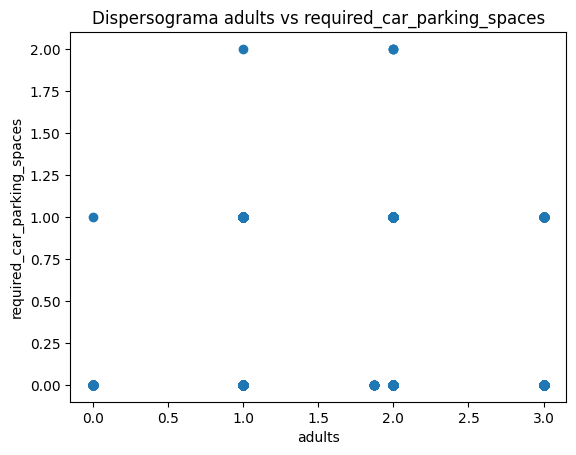

In [165]:
#Scatter Plot
plt.scatter(df_test.adults,df_test.required_car_parking_spaces)
plt.title('Dispersograma adults vs required_car_parking_spaces')
plt.xlabel('adults')
plt.ylabel('required_car_parking_spaces')
plt.show()



In [166]:
#Calulo el vector de medias
vmedias_ar =np.mean(df_test[['adults','required_car_parking_spaces']])

#Calculo la diferencia entre las observaciones y el vector de medias
x_dif_ar = df_test[['adults','required_car_parking_spaces']] - vmedias_ar

#Calculo matriz de covarianza y su inversa
cov_ar=df_test[['adults','required_car_parking_spaces']].cov().values
inv_cov = np.linalg.inv(cov_ar)

#Calculamos el cuadrado de la distancia de mahalanobis
mahal_ar =np.dot( np.dot(x_dif_ar, inv_cov) , x_dif_ar.T)



<Axes: ylabel='mahalanobis_ar'>

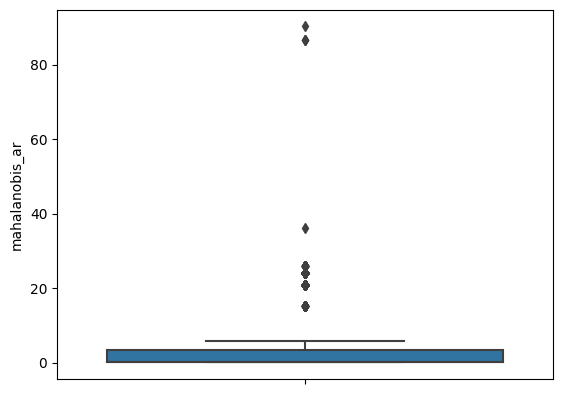

In [167]:
df_test['mahalanobis_ar']=mahal_ar.diagonal()
sns.boxplot(y=df_test.mahalanobis_ar)


In [168]:
np.sort(df_test.mahalanobis_ar)

array([4.80064845e-02, 4.80064845e-02, 4.80064845e-02, ...,
       8.66209883e+01, 8.66209883e+01, 9.02534583e+01])

In [169]:
#Defino umbral
umbral_ar=30

#Observacione anómalas
df_test[df_test['mahalanobis_ar']>umbral_ar]



,hotel,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,...,adr,required_car_parking_spaces,total_of_special_requests,reservation_status_date,id,room_type_match,cancel_to_noncancel_ratio,lead_time_category,days_in_waiting_list_category,mahalanobis_ar
2366,Resort Hotel,74,2017,July,26,1,0.92866,2.520595,1.0,0.0,...,115.0,2,3,2017-07-31,7824b2ca-373e-44d8-9fdc-6e6987e48aea,True,0.0,Medium,Very Short,90.253458
17254,Resort Hotel,246,2017,June,23,6,0.92866,2.520595,2.0,0.0,...,82.0,2,1,2017-06-27,af8600da-3129-40eb-a232-9efbe5b54b38,True,0.0,Long,Very Short,86.620988
19204,Resort Hotel,0,2017,May,22,28,1.00000,0.000000,2.0,0.0,...,99.0,2,0,2017-05-29,46d7547e-c1e6-4eea-96b5-21081e0fe2e5,True,0.0,Very Short,Very Short,86.620988
21826,Resort Hotel,155,2015,August,31,1,0.92866,6.000000,2.0,0.0,...,201.8,2,1,2015-08-11,77d9dbd8-6f7b-48e5-a9f4-8082888c286f,False,0.0,Long,Very Short,86.620988
25290,City Hotel,0,2017,March,12,21,0.00000,0.000000,0.0,0.0,...,0.0,1,1,2017-03-21,d8ef2c39-3bd5-448e-9a28-5d76228be4c2,True,0.0,Very Short,Very Short,36.183548


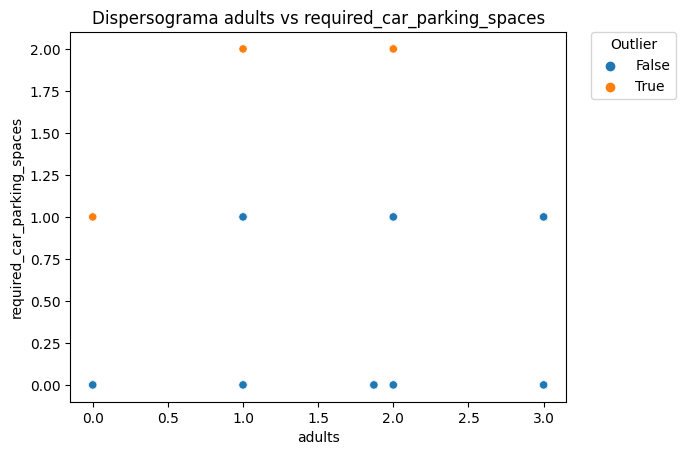

In [170]:

#Grafico scatter
es_outlier_ar = (df_test['mahalanobis_ar'] > umbral_ar)

sns.scatterplot(x=df_test.adults,y=df_test.required_car_parking_spaces, hue=es_outlier_ar)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0, title="Outlier")
plt.title('Dispersograma adults vs required_car_parking_spaces')
plt.show()


In [171]:
media_required_car_parking_spaces = df_test['required_car_parking_spaces'].mean()
df_test.loc[es_outlier_ar, 'required_car_parking_spaces'] = media_required_car_parking_spaces

In [172]:

# Cálculo del vector de medias
vmedias_ar = np.mean(df_test[['stays_in_weekend_nights', 'stays_in_week_nights']])

# Cálculo de la diferencia entre las observaciones y el vector de medias
x_dif_ar = df_test[['stays_in_weekend_nights', 'stays_in_week_nights']] - vmedias_ar

# Cálculo de la matriz de covarianza y su inversa
cov_ar = df_test[['stays_in_weekend_nights', 'stays_in_week_nights']].cov().values
inv_cov = np.linalg.inv(cov_ar)

mahal_ar =np.dot( np.dot(x_dif_ar, inv_cov) , x_dif_ar.T)

<Axes: ylabel='mahalanobis_ar'>

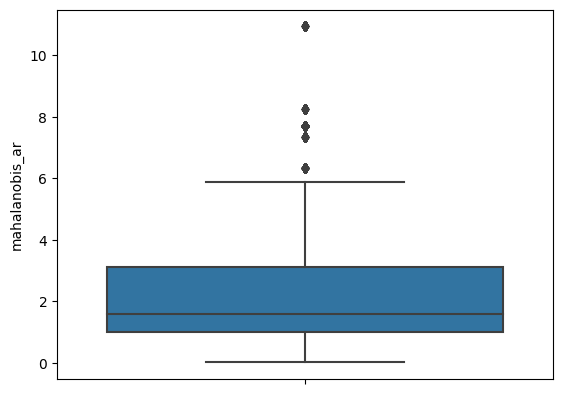

In [173]:
df_test['mahalanobis_ar']=mahal_ar.diagonal()
sns.boxplot(y=df_test.mahalanobis_ar)


In [174]:
umbral_ar = 6.1
# Observaciones anómalas
# df_test[df_test['mahalanobis_ar'] > umbral_ar]


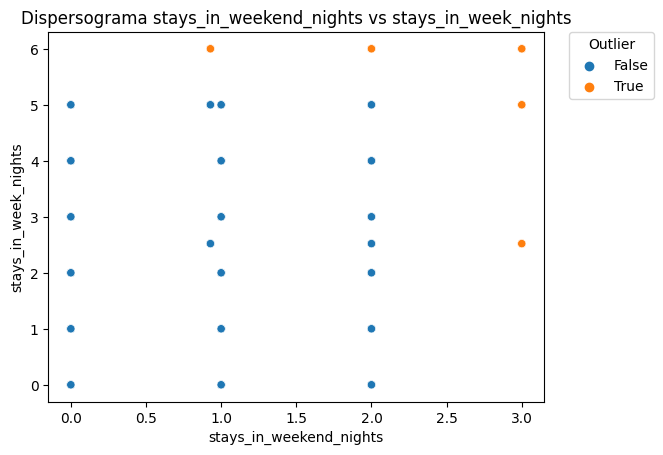

In [175]:
# Gráfico scatter
es_outlier_ar = (df_test['mahalanobis_ar'] > umbral_ar)

sns.scatterplot(x=df_test.stays_in_weekend_nights, y=df_test.stays_in_week_nights, hue=es_outlier_ar)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0, title="Outlier")
plt.title('Dispersograma stays_in_weekend_nights vs stays_in_week_nights')
plt.show()


media_stays_in_week_nights = df_test['stays_in_week_nights'].mean()
df_test.loc[es_outlier_ar, 'stays_in_week_nights'] = media_stays_in_week_nights

media_stays_in_weekend_nights = df_test['stays_in_weekend_nights'].mean()
df_test.loc[es_outlier_ar, 'stays_in_weekend_nights'] = media_stays_in_weekend_nights

In [176]:
### Train

In [177]:
df_train['room_type_match'] = df_train['assigned_room_type'] == df_train['reserved_room_type']
df_train['cancel_to_noncancel_ratio'] = df_train['previous_cancellations'] / (1 + df_train['previous_bookings_not_canceled'])
df_train['lead_time_category'] = pd.cut(df_train['lead_time'], bins=[0, 10, 50, 100, 500, 10000], labels=['Very Short', 'Short', 'Medium', 'Long', 'Very Long'], right=False)
df_train['days_in_waiting_list_category'] = pd.cut(df_train['days_in_waiting_list'], bins=[0, 10, 50, 100, 500, 10000], labels=['Very Short', 'Short', 'Medium', 'Long', 'Very Long'], right=False)

country_counts_train = df_train['country'].value_counts()
top_10_countries_train = country_counts_train.head(10).index.tolist()
df_train['country'] = df_train['country'].apply(lambda x: x if x in top_10_countries_train else 'otro')

market_segment_counts_train = df_train['market_segment'].value_counts()
top_3_ms_train = market_segment_counts_train.head(4).index.tolist()
df_train['market_segment'] = df_train['market_segment'].apply(lambda x: x if x in top_3_ms_train else 'otro')

ct_counts_train = df_train['customer_type'].value_counts()
top_ct_train = ct_counts_train.head(2).index.tolist()
df_train['customer_type'] = df_train['customer_type'].apply(lambda x: x if x in top_ct_train else 'otro')


dc_counts_train = df_train['distribution_channel'].value_counts()
top_dc_train = dc_counts_train.head(2).index.tolist()
df_train['distribution_channel'] = df_train['distribution_channel'].apply(lambda x: x if x in top_dc_train else 'otro')



In [178]:
round(df_train.describe(), 2).transpose()

,count,mean,std,min,25%,50%,75%,max
lead_time,61913.0,112.25,110.72,0.00,23.0,78.0,172.0,629.0
arrival_date_year,61913.0,2016.15,0.71,2015.00,2016.0,2016.0,2017.0,2017.0
arrival_date_week_number,61913.0,27.22,13.53,1.00,16.0,28.0,38.0,53.0
arrival_date_day_of_month,61913.0,15.79,8.80,1.00,8.0,16.0,23.0,31.0
stays_in_weekend_nights,61913.0,0.92,0.99,0.00,0.0,1.0,2.0,16.0
stays_in_week_nights,61913.0,2.51,1.88,0.00,1.0,2.0,3.0,40.0
adults,61913.0,1.86,0.59,0.00,2.0,2.0,2.0,55.0
children,61909.0,0.10,0.40,0.00,0.0,0.0,0.0,10.0
babies,61913.0,0.01,0.09,0.00,0.0,0.0,0.0,9.0
is_repeated_guest,61913.0,0.03,0.16,0.00,0.0,0.0,0.0,1.0


In [179]:
# stays_in_weekend_nights
media_stays_in_weekend_nights = np.mean(df_train.stays_in_weekend_nights)
std_stays_in_weekend_nights = np.std(df_train.stays_in_weekend_nights)
df_train['z_stays_in_weekend_nights'] = (df_train.stays_in_weekend_nights - media_stays_in_weekend_nights) / std_stays_in_weekend_nights

# stays_in_week_nights
media_stays_in_week_nights = np.mean(df_train.stays_in_week_nights)
std_stays_in_week_nights = np.std(df_train.stays_in_week_nights)
df_train['z_stays_in_week_nights'] = (df_train.stays_in_week_nights - media_stays_in_weekend_nights) / std_stays_in_week_nights

# Adults
media_adults = np.mean(df_train.adults)
std_adults = np.std(df_train.adults)
df_train['z_adults'] = (df_train.adults - media_adults) / std_adults

# Babies
media_babies = np.mean(df_train.babies)
std_babies = np.std(df_train.babies)
df_train['z_babies'] = (df_train.babies - media_babies) / std_babies

# Children
media_children = np.mean(df_train.children)
std_children = np.std(df_train.children)
df_train['z_children'] = (df_train.children - media_children) / std_children

# Adr
media_adr = np.mean(df_train.adr)
std_adr = np.std(df_train.adr)
df_train['z_adr'] = (df_train.adr - media_adr) / std_adr


In [180]:
df_train.loc[(df_train['z_stays_in_weekend_nights'] > 3), 'stays_in_weekend_nights'] = media_stays_in_weekend_nights
df_train.loc[(df_train['z_stays_in_weekend_nights'] < -3), 'stays_in_weekend_nights'] = media_stays_in_weekend_nights

df_train.loc[(df_train['z_stays_in_week_nights'] > 3), 'stays_in_week_nights'] = media_stays_in_week_nights
df_train.loc[(df_train['z_stays_in_week_nights'] < -3), 'stays_in_week_nights'] = media_stays_in_week_nights

df_train.loc[(df_train['z_adults'] > 3), 'adults'] = media_adults
df_train.loc[(df_train['z_adults'] < -3), 'adults'] = media_adults

df_train.loc[(df_train['z_babies'] > 3), 'babies'] = media_babies
df_train.loc[(df_train['z_babies'] < -3), 'babies'] = media_babies

df_train.loc[(df_train['z_children'] > 3), 'children'] = media_children
df_train.loc[(df_train['z_children'] < -3), 'children'] = media_children

df_train.loc[(df_train['z_adr'] > 5), 'adr'] = media_adr
df_train.loc[(df_train['z_adr'] < -5), 'adr'] = media_adr


In [181]:
df_train.drop(columns =['z_adults', 'z_babies', 'z_children','z_adr', 'z_stays_in_weekend_nights','z_stays_in_week_nights'], axis=1, inplace = True)

In [182]:
round(df_train.describe(), 2).transpose()

,count,mean,std,min,25%,50%,75%,max
lead_time,61913.0,112.25,110.72,0.00,23.0,78.0,172.0,629.00
arrival_date_year,61913.0,2016.15,0.71,2015.00,2016.0,2016.0,2017.0,2017.00
arrival_date_week_number,61913.0,27.22,13.53,1.00,16.0,28.0,38.0,53.00
arrival_date_day_of_month,61913.0,15.79,8.80,1.00,8.0,16.0,23.0,31.00
stays_in_weekend_nights,61913.0,0.86,0.86,0.00,0.0,1.0,2.0,3.00
stays_in_week_nights,61913.0,2.32,1.39,0.00,1.0,2.0,3.0,6.00
adults,61913.0,1.86,0.47,1.00,2.0,2.0,2.0,3.00
children,61909.0,0.04,0.20,0.00,0.0,0.0,0.0,1.00
babies,61913.0,0.00,0.00,0.00,0.0,0.0,0.0,0.01
is_repeated_guest,61913.0,0.03,0.16,0.00,0.0,0.0,0.0,1.00


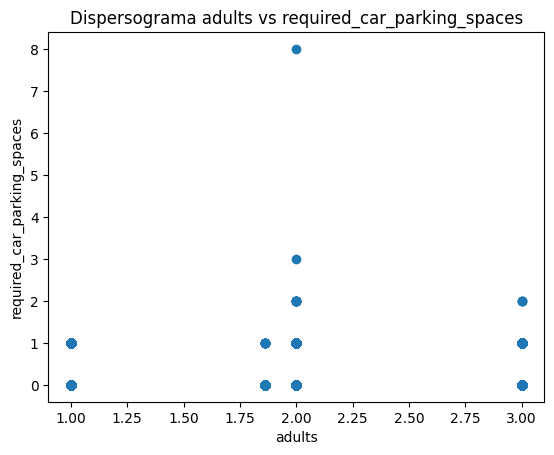

In [183]:
# Scatter Plot
plt.scatter(df_train.adults, df_train.required_car_parking_spaces)
plt.title('Dispersograma adults vs required_car_parking_spaces')
plt.xlabel('adults')
plt.ylabel('required_car_parking_spaces')
plt.show()

In [184]:

# Cálculo del vector de medias
vmedias_ar = np.mean(df_train[['adults', 'required_car_parking_spaces']])

# Cálculo de la diferencia entre las observaciones y el vector de medias
x_dif_ar = df_train[['adults', 'required_car_parking_spaces']] - vmedias_ar

# Cálculo de la matriz de covarianza y su inversa
cov_ar = df_train[['adults', 'required_car_parking_spaces']].cov().values
inv_cov = np.linalg.inv(cov_ar)

# Cálculo del cuadrado de la distancia de Mahalanobis
from scipy.spatial import distance
distancias_mahalanobis = []

# Iterar sobre las filas del DataFrame df_train
for index, fila in df_train.iterrows():
    vector_datos = fila[['adults', 'required_car_parking_spaces']].values
    distancia_mahalanobis = distance.mahalanobis(vector_datos, vmedias_ar, inv_cov)
    distancias_mahalanobis.append(distancia_mahalanobis)

<Axes: ylabel='mahalanobis_ar'>

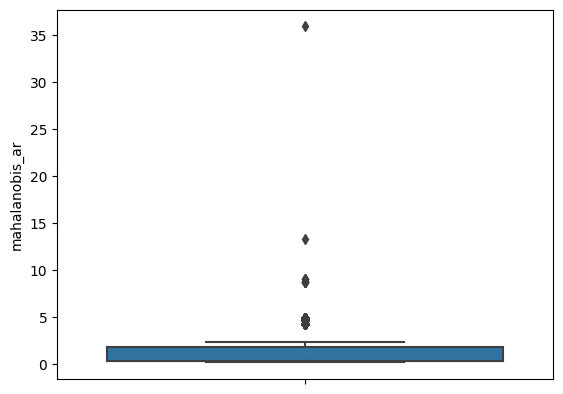

In [185]:

df_train['mahalanobis_ar'] = distancias_mahalanobis
sns.boxplot(y=df_train.mahalanobis_ar)


In [186]:
umbral_ar = 8
# Observaciones anómalas
# df_train[df_train['mahalanobis_ar'] > umbral_ar]


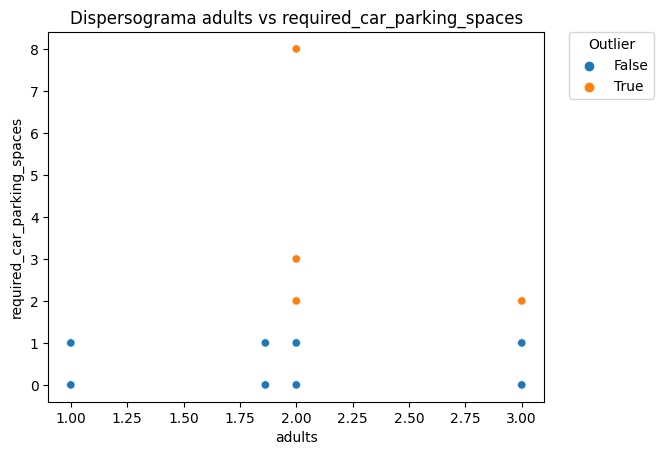

In [187]:
# Gráfico scatter
es_outlier_ar = (df_train['mahalanobis_ar'] > umbral_ar)

sns.scatterplot(x=df_train.adults, y=df_train.required_car_parking_spaces, hue=es_outlier_ar)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0, title="Outlier")
plt.title('Dispersograma adults vs required_car_parking_spaces')
plt.show()


In [188]:

# Cálculo del vector de medias
vmedias_ar = np.mean(df_train[['stays_in_weekend_nights', 'stays_in_week_nights']])

# Cálculo de la diferencia entre las observaciones y el vector de medias
x_dif_ar = df_train[['stays_in_weekend_nights', 'stays_in_week_nights']] - vmedias_ar

# Cálculo de la matriz de covarianza y su inversa
cov_ar = df_train[['stays_in_weekend_nights', 'stays_in_week_nights']].cov().values
inv_cov = np.linalg.inv(cov_ar)

# Cálculo del cuadrado de la distancia de Mahalanobis
from scipy.spatial import distance
distancias_mahalanobis = []

# Iterar sobre las filas del DataFrame df_train
for index, fila in df_train.iterrows():
    vector_datos = fila[['stays_in_weekend_nights', 'stays_in_week_nights']].values
    distancia_mahalanobis = distance.mahalanobis(vector_datos, vmedias_ar, inv_cov)
    distancias_mahalanobis.append(distancia_mahalanobis)

<Axes: ylabel='mahalanobis_ar'>

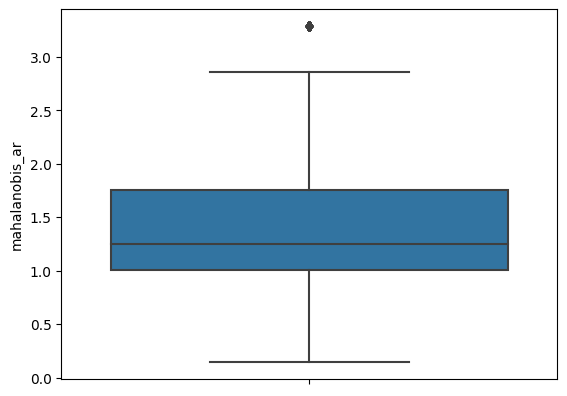

In [189]:

df_train['mahalanobis_ar'] = distancias_mahalanobis
sns.boxplot(y=df_train.mahalanobis_ar)


In [190]:
umbral_ar = 8
# Observaciones anómalas
# df_train[df_train['mahalanobis_ar'] > umbral_ar]

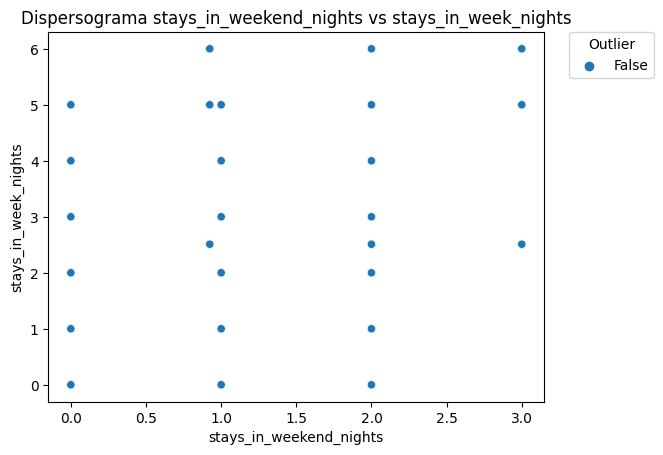

In [191]:
# Gráfico scatter
es_outlier_ar = (df_train['mahalanobis_ar'] > umbral_ar)

sns.scatterplot(x=df_train.stays_in_weekend_nights, y=df_train.stays_in_week_nights, hue=es_outlier_ar)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0, title="Outlier")
plt.title('Dispersograma stays_in_weekend_nights vs stays_in_week_nights')
plt.show()

media_stays_in_week_nights = df_train['stays_in_week_nights'].mean()
df_train.loc[es_outlier_ar, 'stays_in_week_nights'] = media_stays_in_week_nights

media_stays_in_weekend_nights = df_train['stays_in_weekend_nights'].mean()
df_train.loc[es_outlier_ar, 'stays_in_weekend_nights'] = media_stays_in_weekend_nights


In [192]:
df_train['children'].fillna(df_train['children'].mean(), inplace=True)

In [193]:
df_train['adults'] = df_train['adults'].round().astype(int)
df_test['adults'] = df_test['adults'].round().astype(int)

df_train['babies'] = df_train['babies'].round().astype(int)
df_test['babies'] = df_test['babies'].round().astype(int)

df_train['stays_in_weekend_nights'] = df_train['stays_in_weekend_nights'].round().astype(int)
df_test['stays_in_weekend_nights'] = df_test['stays_in_weekend_nights'].round().astype(int)

df_train['children'] = df_train['children'].round().astype(int)
df_test['children'] = df_test['children'].round().astype(int)

df_train['required_car_parking_spaces'] = df_train['required_car_parking_spaces'].round().astype(int)
df_test['required_car_parking_spaces'] = df_test['required_car_parking_spaces'].round().astype(int)

df_train['stays_in_week_nights'] = df_train['stays_in_week_nights'].round().astype(int)
df_test['stays_in_week_nights'] = df_test['stays_in_week_nights'].round().astype(int)

df_train['stays_in_weekend_nights'] = df_train['stays_in_weekend_nights'].round().astype(int)
df_test['stays_in_weekend_nights'] = df_test['stays_in_weekend_nights'].round().astype(int)

### Probamos a ver si tira buena prediccion lrpm

<Axes: >

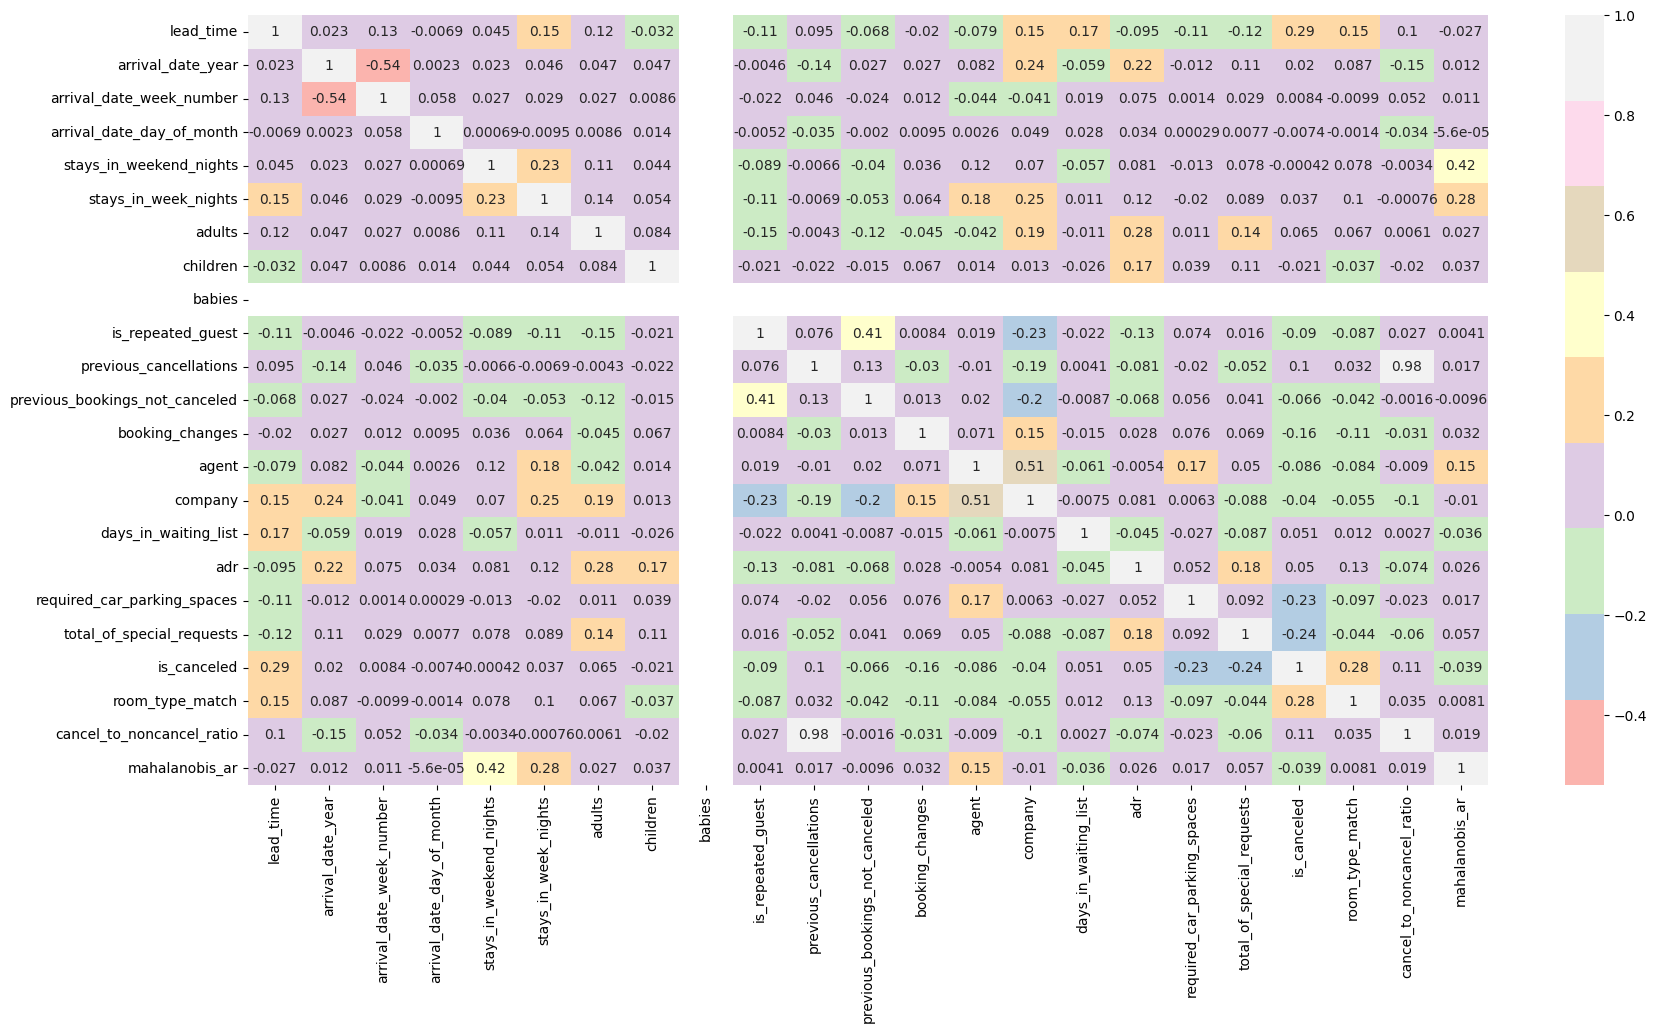

In [194]:

plt.figure(figsize = (20,10))
sns.heatmap(df_train.corr(numeric_only = True),annot = True, cmap= "Pastel1")

In [195]:
# df_test.to_csv('df_test_limpio.csv')
# files.download('df_test_limpio.csv')

# df_train.to_csv('df_train_limpio.csv')
# files.download('df_train_limpio.csv')

In [200]:
df_train["stay_duration"] = df_train["stays_in_weekend_nights"] + df_train["stays_in_week_nights"]
df_train["total_guests"] = df_train["adults"] + df_train["children"] + df_train["babies"]
df_train["agency_booking"] = (~df_train["agent"].isna()).astype(int)

df_test["stay_duration"] = df_test["stays_in_weekend_nights"] + df_test["stays_in_week_nights"]
df_test["total_guests"] = df_test["adults"] + df_test["children"] + df_test["babies"]
df_test["agency_booking"] = (~df_test["agent"].isna()).astype(int)

columna_a_eliminar_test = 'reservation_status_date'
df_test.drop(columna_a_eliminar_test, axis='columns', inplace = True)


df_test.insert(1, 'is_canceled', " ")


features = ['booking_changes', 'room_type_match', 'total_of_special_requests', 'required_car_parking_spaces', 'stay_duration',
          'is_repeated_guest', 'cancel_to_noncancel_ratio', 'adults', 'adr', 'previous_cancellations', 'arrival_date_year', 'agent',
          'lead_time_category','hotel', 'country', 'market_segment', 'deposit_type', 'distribution_channel', 'days_in_waiting_list_category', 'customer_type',
            'is_canceled','id']

columns_to_dum= ['lead_time_category','hotel', 'country', 'market_segment', 'deposit_type', 'distribution_channel', 'days_in_waiting_list_category', 'customer_type']
df_train.shape

(54023, 39)

In [197]:
df_train.dropna(subset = ['agent'], inplace = True)

In [198]:
df_train.shape

(54023, 39)

In [201]:
df_trabajo_train = df_train[features]
df_trabajo_train_dum = pd.get_dummies(df_trabajo_train, columns = columns_to_dum)

df_trabajo_test = df_test[features]
df_trabajo_test_dum = pd.get_dummies(df_trabajo_test, columns = columns_to_dum)

In [202]:
# for column in df_trabajo_train.columns:
#     unique_values = df_test[column].unique()
#     print(f"Columna: {column}")
#     print(f"Valores únicos: {unique_values}")
#     print("-" * 50)

In [203]:
X = df_trabajo_train_dum.drop(['is_canceled', 'id'], axis=1)
y = df_trabajo_train_dum['is_canceled'].copy()

In [204]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=22)

In [205]:
param_dist = {
    'n_estimators': [50, 100, 150, 200, 300],
    'learning_rate': [0.01, 0.05, 0.1, 0.2],
    'max_depth': [3, 4, 5, 6, 7, 8],
    'colsample_bytree': [0.7, 0.8, 0.9, 1],
    'subsample': [0.7, 0.8, 0.9, 1],
    'gamma': [0, 0.1, 0.2],
    'min_child_weight': [1, 2, 3, 4]
}

clf = xgb.XGBClassifier(objective='binary:logistic')

In [206]:
import xgboost as xgb
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.metrics import f1_score, make_scorer
f1_scorer = make_scorer(f1_score)

random_search = RandomizedSearchCV(
    clf,
    param_distributions=param_dist,
    scoring=f1_scorer,
    n_iter=50,  # número de combinaciones de hiperparámetros a probar, puedes ajustar según tus necesidades
    cv=5,
    verbose=1,
    n_jobs=-1
)

random_search.fit(X_train, y_train)

Fitting 5 folds for each of 50 candidates, totalling 250 fits


RandomizedSearchCV(cv=5,
                   estimator=XGBClassifier(base_score=None, booster=None,
                                           callbacks=None,
                                           colsample_bylevel=None,
                                           colsample_bynode=None,
                                           colsample_bytree=None, device=None,
                                           early_stopping_rounds=None,
                                           enable_categorical=False,
                                           eval_metric=None, feature_types=None,
                                           gamma=None, grow_policy=None,
                                           importance_type=None,
                                           interaction_constraints=None,
                                           learning_rate...
                                           n_estimators=None, n_jobs=None,
                                           num_parallel_tree=None,
                                           random_state=None, ...),
                   n_iter=50, n_jobs=-1,
                   param_distributions={'colsample_bytree': [0.7, 0.8, 0.9, 1],
                                        'gamma': [0, 0.1, 0.2],
                                        'learning_rate': [0.01, 0.05, 0.1, 0.2],
                                        'max_depth': [3, 4, 5, 6, 7, 8],
                                        'min_child_weight': [1, 2, 3, 4],
                                        'n_estimators': [50, 100, 150, 200,
                                                         300],
                                        'subsample': [0.7, 0.8, 0.9, 1]},
                   scoring=make_scorer(f1_score), verbose=1)

In [207]:
best_model = random_search.best_estimator_
y_predxgboost = best_model.predict(X_test)

In [208]:
def mostrar_metricas(y_test, y_pred):
    accuracy=accuracy_score(y_test,y_pred)
    recall=recall_score(y_test,y_pred)
    f1=f1_score(y_test,y_pred)
    precision=precision_score(y_test,y_pred)

    print("Accuracy: "+str(accuracy))
    print("Recall: "+str(recall))
    print("Precision: "+str(precision))
    print("f1 score: "+str(f1))

In [209]:
mostrar_metricas(y_test,y_predxgboost)

Accuracy: 0.8669093601530203
Recall: 0.8869182240209499
Precision: 0.8605913605913605
f1 score: 0.8735564804502022


In [210]:
from google.colab import files
df_xgb = df_trabajo_test_dum.drop(['is_canceled', 'id'], axis='columns', inplace=False)
ids3 = df_trabajo_test_dum['id'].copy()


pred_xgb = best_model.predict(df_xgb)

df_pred_xgb = pd.DataFrame({'id': ids3, 'is_canceled': pred_xgb})

df_pred_xgb.to_csv('df_pred_xgb.csv')
files.download('df_pred_xgb.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [211]:
# df_trabajo_test_dum.to_csv('df_test_limpio.csv')
# files.download('df_test_limpio.csv')

# df_trabajo_train_dum.to_csv('df_train_limpio.csv')
# files.download('df_train_limpio.csv')


In [212]:
# for column in df_test.columns:
#     unique_values = df_test[column].unique()
#     print(f"Columna: {column}")
#     print(f"Valores posibles: {unique_values}")
#     print("-" * 50)  # Linea separadora
